# Projeto de Descoberta de Fraudes no consumo de Água com Deep Learning💧

## Empresa parceira: Aegea Saneamento

- Abaixo você irá encontrar descrições sobre a problemática relacionada ao projeto e o nosso objetivo e benefícios que esperamos alcançar. 👇

#### Problemática base 🚨

A fraude no consumo de água é um grande desafio enfrentado pela empresa e qualquer empresa de prestação de serviços de saneamento. Esse problema afeta tanto o faturamento e a arrecadação da empresa, quanto a qualidade do serviço de abastecimento de água.

A fraude acontece quando um consumidor manipula o instrumento de medição de consumo de água, chamado hidrômetro, realiza ligações clandestinas ou qualquer forma de adulteração que reduza ou até mesmo elimine os valores cobrados pelo consumo real.

As práticas acima descritas, além de causarem perdas econômicas para Aegea, também geram impactos na qualidade do abastecimento de água à população, comprometendo a eficiência e a integridade física da infraestrutura de distribuição de água.

#### Impactos 📊

- Danos a tubulações resultando em vazamentos, resultando em perda de água e alteração na pressão da rede de distribuição de água.
- Intermitência no abastecimento de água à população.
- Redução de valores faturados e, consequentemente, diminuição de receita.
- Aumento do risco de contaminação da água, uma vez que métodos fraudulentos não seguem padrões de segurança, possibilitando a presença de contaminantes nas redes de abastecimento.

#### Mediação 🔍

Para combater esse problema, atualmente existem diversas estratégias aplicadas na empresa, desde verificar alterações no padrão de consumo dos clientes até apontamentos de agentes de campo. Em todos os casos existem equipes especializadas em fiscalizar e sanar quaisquer fraudes que sejam detectadas. A atuação dessas equipes é delimitada diariamente por uma lista de alvos para fiscalização.

Diante do cenário acima descrito, deseja-se o desenvolvimento de uma aplicação que melhore a assertividade da atuação da Aegea na detecção de fraudes em seu âmbito de atuação, construindo um modelo de Machine Learning que demonstre eficácia nos processos de negócio.

### Objetivo e Benefícios esperados ✅

- Determinar a probabilidade de um comportamento do consumo ser fraudulento ou não, considerando, de maneira holística, dados históricos de consumo e, caso necessário, a influência de variáveis exógenas, como índices macroeconômicos, climáticos, geográficos, dentre outros.

- Melhorar a capacidade de detecção e predição de fraudes de consumo de água dos consumidores nas áreas de atuação da Aegea. Compreender melhor elementos importantes para detecção e predição de fraudes nos clientes da Aegea

## **Integrantes do Grupo** 🚀
- Camila Anacleto
- Henri Harari
- Patrick Victorino
- Pedro Rezende
- Sophia Dias
- Vitória Rodrigues

---
# Sobre o notebook 🥸

## Objetivo 🎯

O objetivo principal do desenvolvimento deste notebook é realizar a construção de uma pipeline de tratamento dos dados, abrangendo um período de 12 meses, juntamente com a base de dados de fraudes identificadas nesse intervalo.

Além disso, a finalidade é termos um dataset final que possa ser inserido em um modelo de Machine Learning para a identificação de fraudes no consumo de água.

# Implementando cuDF

- Aqui fazemos uma verificação para entender se uma GPU está sendo utilizada ou não.
- Para o projeto como um todo, desenvolvemos no Colab Pro, usando o tempo de execução em T4 GPU.

- O principal motivo de estarmos utilizando a GPU é para acelerar o processamento dos dados, visto que o cuDF é uma biblioteca que permite a manipulação de dados em GPU, o que torna o processamento mais rápido.
- Um exemplo claro disso é percebido no momento de aplicação da pipeline de tratamento dos dados, que é um processo que demanda um tempo considerável de execução. Porém, esse processo é fácilmente completado em menos de 1 minuto.

In [ ]:
!nvidia-smi

Sun Sep 29 21:16:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%load_ext cudf.pandas

# Importações dos dados e instalações de bibliotecas

In [ ]:
%pip install -q -r requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
import gdown
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.metrics import BinaryAccuracy, AUC, Precision, Recall, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, Lion
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
tf.random.set_seed(42)

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Baixando dados

- Aqui teríamos uma API que tem o recebimento dessa base de dados - pode ser como CSV

In [ ]:
# Dados de consumo
!gdown 1cHO3bohcg-MxWj7tREjLjzxVANsYMJSe # 2024
!gdown 1MWbkm7-OIUPM1Bq0Oscij-68cXDcCg_R # 2023

Downloading...
From (original): https://drive.google.com/uc?id=1cHO3bohcg-MxWj7tREjLjzxVANsYMJSe
From (redirected): https://drive.google.com/uc?id=1cHO3bohcg-MxWj7tREjLjzxVANsYMJSe&confirm=t&uuid=6d4a39c7-7274-4411-8dc9-1a974a626617
To: /content/CONSUMO_2024.csv
100% 668M/668M [00:04<00:00, 143MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1MWbkm7-OIUPM1Bq0Oscij-68cXDcCg_R
From (redirected): https://drive.google.com/uc?id=1MWbkm7-OIUPM1Bq0Oscij-68cXDcCg_R&confirm=t&uuid=16467889-93f2-47d8-8d33-0fce98a602ec
To: /content/CONSUMO_2023.csv
100% 1.09G/1.09G [00:08<00:00, 136MB/s]


- A base de fraudes não seria incluida como recebimento na API, mas como algo apartado para ser estruturado toda vez que é necessário um retreino da IA

In [ ]:
# Fraudes
!gdown 1iZBUheWYMZn1FEgvf5I7ga_w1EEwz6mK

Downloading...
From: https://drive.google.com/uc?id=1iZBUheWYMZn1FEgvf5I7ga_w1EEwz6mK
To: /content/FRAUDES_HIST.csv
100% 97.5M/97.5M [00:01<00:00, 71.6MB/s]


### Leitura dos arquivos

- CONSUMO

In [ ]:
df_2023 = pd.read_csv('/content/CONSUMO_2023.csv', delimiter=';', index_col='Unnamed: 0')
df_2024 = pd.read_csv('/content/CONSUMO_2024.csv', delimiter=';', index_col='Unnamed: 0')
df_consumo = pd.concat([df_2023, df_2024]) # já estamos concatendo os datasets para não termos problemas no decorrer da nossa análise

- FRAUDES

In [ ]:
df_fraude = pd.read_csv('/content/FRAUDES_HIST.csv', delimiter=';', index_col='Unnamed: 0')

# Tratamento de dados

Para o nosso projeto, foram cridos pré-processamentos com o intuito de garantir que os dados estejam em um formato adequado para alimentar o modelo de deep learning, otimizando o processo de aprendizado e aumentando a precisão das previsões. Este processo inclui várias etapas cruciais, que são fundamentais para preparar os dados de forma consistente e padronizada, visando garantir que o modelo possa extrair padrões significativos e fornecer previsões mais precisas e confiáveis:

* **Seleção de colunas**: seleção das colunas referentes as features que serão utilizadas pelo modelo. Fazemos isso, em vez de dropar colunas, por questão de processamento, já que com o drop, tem que ser percorrido todo o dataset, enquanto na seleção, só procura aqueles específicos.

* **Conversão do tipo de dados**: a etapa de Conversão do Tipo de Dados será aplicada para garantir que os dados estejam no formato adequado para processamento pelo modelo de deep learning. Essa etapa assegura que os tipos de dados, como números e datas, estejam corretamente formatados, o que é crucial para evitar erros e para que o modelo possa interpretar e aprender a partir dos dados de forma eficaz.

* **Tratamento de Texto**: Para uniformizar os dados textuais, todo o texto será convertido para maiúsculas e caracteres especiais serão removidos. Essas transformações são necessárias para garantir consistência na forma como as palavras são processadas, eliminando variações que possam confundir o modelo. Além disso, foi criado uma outra função para fazer o agrupamento de diferentes valores para algumas colunas que possuem muitos valores diferentes, porém, não terão grande impacto no modelo.

- **Categorização de Dados**: Para garantir que os dados estejam estruturados de forma que o modelo de deep learning possa reconhecer padrões e realizar previsões mais precisas, foi implementada a categorização de algumas colunas críticas. Por exemplo, a coluna de "economias" foi categorizada para diferenciar entre consumidores sem economias, com uma economia ou com múltiplas economias. Da mesma forma, a coluna "dias de leitura" foi categorizada em quatro níveis (baixo, médio, alto e muito alto), com base no número de dias entre as leituras. A categorização ajuda a reduzir a variabilidade nos dados e melhora a capacidade do modelo de identificar correlações significativas.

- **Clusterização de Dados**: A técnica de clustering foi aplicada a determinadas colunas para agrupar dados com características semelhantes. O método de K-means foi utilizado para criar clusters a partir de dados numéricos, como consumo de água, e dados textuais, utilizando vetorização TF-IDF para transformar o texto em valores numéricos. O resultado da clusterização foi adicionado ao DataFrame, criando uma nova coluna de clusters que pode ser utilizada como uma feature adicional no treinamento do modelo. Isso permite que o modelo capture padrões complexos dentro dos grupos, melhorando a capacidade de previsão.

* **One Hot Encoding**: As variáveis categóricas serão convertidas em uma representação numérica utilizando o One Hot Encoding. Essa técnica é crucial para transformar dados categóricos em um formato compatível com o modelo de deep learning, garantindo que as categorias sejam tratadas de maneira uniforme, sem a criação de hierarquias falsas, e permitindo que o modelo interprete cada categoria como uma entidade independente.
<br>

**NÃO É MAIS USADO**
* ~Categoria de consumo~: A categoria de consumo foi criada para classificar os consumidores em diferentes grupos, com base em seu padrão de consumo. Essa classificação é essencial para identificar possíveis fraudes, uma vez que consumidores com padrões de consumo semelhantes podem ser comparados entre si, facilitando a detecção de anomalias e comportamentos suspeitos.

* ~Normalização~: A normalização será aplicada para escalar os dados dentro de um intervalo específico, entre 0 e 1. Isso é essencial para assegurar que todas as características tenham a mesma importância durante o treinamento do modelo, evitando que atributos com valores mais altos dominem o aprendizado e ajudando a acelerar a convergência do algoritmo.

* ~Redimensionamento do Data Frame~: Para se adequar a um formato adequado para rede neural foi realizado o redimensionamento do dataframe, fazendo assim com que cada linha vire uma matrícula diferente, e com que os dados referentes a cada mês vire uma coluna diferente. Assim possibilitando que seja feita uma análise referente a cada matrícula

### Seleção de colunas

Codigo para remoção de colunas referentes à features que não serão utilizadas para o treinamento do modelo.

In [ ]:
# antiga função de remoção de colunas
# def drop_columns(df, column_name):
#   df = df.drop(column_name, axis=1)
#   return df

In [ ]:
# colunas = ['MATRICULA', 'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL', 'ECO_PUBLICA', 'DAT_LEITURA', 'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA', 'DSC_OCORRENCIA']

def columns_selection(df, column_names):
    # Ensure column_names is a list
    if not isinstance(column_names, list):
        column_names = [column_names]
    # Filtrando o DataFrame com base nas colunas recebidas na lista
    df_filtrado = df[column_names]
    return df_filtrado

### Conversão dos tipos de dados

In [ ]:
def convert_data_types(datasets):
  for column in datasets.select_dtypes(include=['float64']).columns:
      if column not in ["CONS_MEDIDO"]:
          datasets[column] = datasets[column].astype('int64')

  # Convert specific object columns to datetime
  if 'DAT_LEITURA' in datasets.columns:
      datasets['DAT_LEITURA'] = pd.to_datetime(datasets['DAT_LEITURA'], errors='coerce')
  return datasets

### Padronização das colunas

Padronização das colunas de texto de forma a evitar possiveis problemas causados por textos mal formatados.

In [ ]:
def padronizar_texto(df, column_name):

  # Cria uma cópia da coluna para evitar modificações no DataFrame original
  new_column = df[column_name].copy()

  # Converte todos os textos para maiúsculas
  new_column = new_column.str.upper()

  # Remove caracteres especiais
  new_column = new_column.apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', str(x)))

  return new_column

Vale mencionar que a função realiza tanto a padronização dos textos para maiusculos tanto a remoção de qualquer carctere especial.

### Categorizando as colunas

In [ ]:
def categorize_economias(value):
    if value == 0:
        return 0 # Sem economias
    elif value == 1:
        return 1 # Uma economia
    else:
        return 2 # Múltiplas economias

In [ ]:
def categorize_dias_leitura(value):
  if value <= 15:
    return 0 # BAIXO - Menor que 15 dias
  elif value <= 30:
    return 1 # MEDIO - Entre 16 e 30 dias
  elif value <= 45:
    return 2 # ALTO - Entre 31 e 45 dias
  else:
    return 3 # MUITO_ALTO - Maior que 45 dias

### Fazendo clusters

In [ ]:
# num_clusters = 10
# num_clusters = 25
def apply_clustering(df, column_name, num_clusters, max_features=1000, is_text=False):
    """
    Função que aplica KMeans em uma coluna do DataFrame, seja ela de texto ou numérica.

    Parâmetros:
    df: DataFrame pandas com os dados
    column_name: Nome da coluna a ser utilizada para a clusterização
    num_clusters: Número de clusters a serem criados
    max_features: Máximo de features para o TfidfVectorizer (apenas para colunas de texto)
    is_text: Indica se a coluna é de texto e precisa ser vetorizada

    Retorna:
    DataFrame com a coluna de cluster adicionada.
    """

    # Preprocessamento da coluna
    data = df[column_name].fillna('')

    if is_text:
        # Vetorização TF-IDF para colunas de texto
        data = data.astype(str).tolist()
        vectorizer = TfidfVectorizer(max_features=max_features)
        tfidf_matrix = vectorizer.fit_transform(data)
        features = tfidf_matrix
    else:
        # Conversão para formato numérico (para dados como consumo)
        data = data.astype(float).tolist()
        features = np.array(data).reshape(-1, 1)

    # Criação e treinamento do modelo KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features)

    # Adicionando os clusters ao DataFrame
    cluster_column_name = f'CLUSTER_{column_name}'
    df[cluster_column_name] = kmeans.labels_

    return df

### One hot encoding

Codificação One-Hot para garantir que as variáveis categóricas sejam representadas de forma adequada no modelo, evitando que o algoritmo interprete erroneamente as categorias.

In [ ]:
def one_hot_encoding(df, column_name):
  df_encoded = pd.get_dummies(df, columns=[column_name], prefix=[column_name])
  return df_encoded

### ~Criação de categoria de consumo~

Tramento para criação de categorias de consumo, que podem sem utilizadas para ánalise

In [ ]:
# def categorizar_consumo(df, column_name):


#   # Criação novas colunas para as categorias de consumo
#   df['Consumo_Alto'] = 0
#   df['Consumo_Medio'] = 0
#   df['Consumo_Baixo'] = 0

#   # Categorizando o consumo
#   df.loc[df[column_name] > 0.7, 'Consumo_Alto'] = 1
#   df.loc[(df[column_name] >= 0.2) & (df[column_name] <= 0.7), 'Consumo_Medio'] = 1
#   df.loc[df[column_name] < 0.2, 'Consumo_Baixo'] = 1

#   return df

### ~Normalização~

Normalização dos dados para garantir que todas as variáveis tivessem uma escala comparável, evitando que alguma variável dominasse o modelo devido a valores mais altos.

In [ ]:
# def normalize_column(df, column_name):
#     # Cria uma instância do RobustScaler
#     scaler = RobustScaler()

#     # Ajusta o scaler à coluna e transforma os dados
#     df_normalized = df.copy()
#     df_normalized[column_name] = scaler.fit_transform(df[[column_name]])

#     return df_normalized[column_name]

### ~Redimensionamento do dataframe~:

Codigo para redimensionar a tabela, visando tranformar cada linha do dataframe em uma matricula, e cada mês em uma coluna propria no dataframe:


In [ ]:
# def redimensionar_dataframe(df, coluna_data, coluna_matricula, colunas_features):
#     # # Converte a coluna de data para datetime
#     # df[coluna_data] = pd.to_datetime(df[coluna_data])

#     # Determina a data mais recente (M) no DataFrame
#     data_maxima = df[coluna_data].max()

#     # Calcula a data limite (M - 5 meses)
#     data_limite = data_maxima - pd.DateOffset(months=5)

#     # Filtra o DataFrame para manter apenas as datas no intervalo entre data_limite e data_maxima
#     df = df[(df[coluna_data] >= data_limite) & (df[coluna_data] <= data_maxima)]

#     # Cria um dicionário para armazenar os dados redimensionados
#     dados_redimensionados = {}

#     # Identifica as colunas que não estão nas colunas_features
#     colunas_estaticas = [col for col in df.columns if col not in colunas_features and col not in [coluna_data, coluna_matricula]]

#     # Itera sobre as matrículas únicas
#     for matricula in df[coluna_matricula].unique():
#         # Filtra o DataFrame para a matrícula atual
#         df_matricula = df[df[coluna_matricula] == matricula]

#         # Cria um dicionário para armazenar os dados da matrícula atual
#         dados_matricula = {coluna_matricula: matricula}

#         # Adiciona as colunas estáticas (que não variam com o tempo)
#         for coluna in colunas_estaticas:
#             dados_matricula[coluna] = df_matricula[coluna].iloc[0]

#         # Para cada coluna feature, cria uma nova coluna para cada mês do intervalo
#         for coluna in colunas_features:
#             for i, data in enumerate(pd.date_range(data_limite, data_maxima, freq='M')):
#                 # Verifica se a data existe no DataFrame filtrado pela matrícula
#                 valor = df_matricula.loc[df_matricula[coluna_data].dt.to_period('M') == data.to_period('M'), coluna]

#                 # Adiciona o valor correspondente, ou 0 se a data não existir
#                 if not valor.empty:
#                     dados_matricula[f"{coluna}_M-{i}"] = valor.iloc[0]
#                 else:
#                     dados_matricula[f"{coluna}_M-{i}"] = 0

#         # Adiciona os dados da matrícula ao dicionário principal
#         dados_redimensionados[matricula] = dados_matricula

#     # Cria um novo DataFrame a partir do dicionário redimensionado
#     df_redimensionado = pd.DataFrame.from_dict(dados_redimensionados, orient='index')

#     # Substitui todos os NaN por 0 no DataFrame final
#     df_redimensionado.fillna(0, inplace=True)

#     return df_redimensionado

# Construindo Pipe de tratamento

Para garantir que os dados sejam processados corretamente, foi desenvolvida uma pipeline de pré-processamento robusta e flexível, capaz de se adaptar a diferentes data frames. Essa pipeline foi projetada para executar de forma automática todos os tratamentos necessários, conforme descrito no tópico de pré-processamento de dados. Com isso, assegura-se que cada conjunto de dados seja tratado de maneira adequada e consistente, independentemente das suas particularidades ou formatos, assim sendo adaptavel as nescecidades de cada dataframe e possibilitando a adição de novas bases ao projeto.

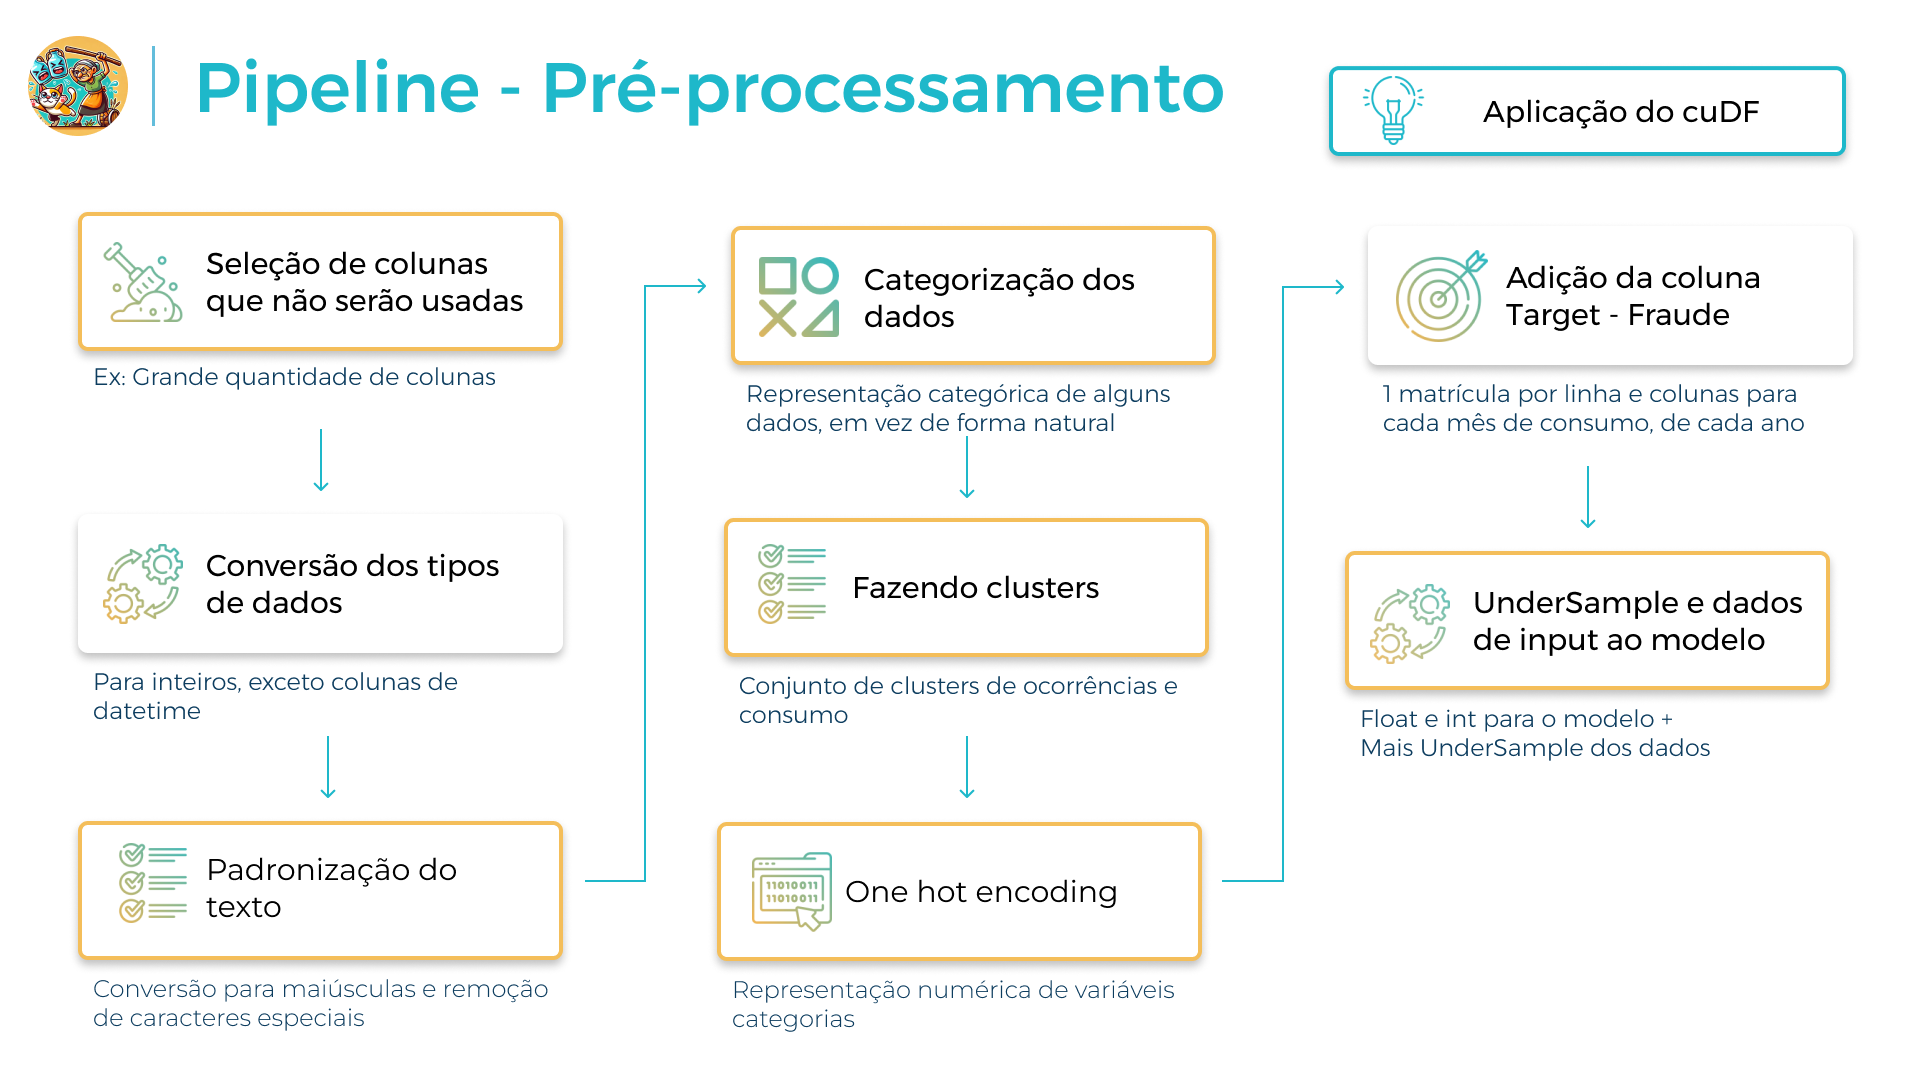

In [ ]:
def pipeline_tratamento(df_CONSUMO, colunas_selecao, colunas_padronizar, colunas_economias, coluna_dias_leitura, colunas_clusters, colunas_onehot, coluna_consumo, coluna_data, coluna_matricula, colunas_features):

  df_CONSUMO = columns_selection(df_CONSUMO, colunas_selecao)

  df_CONSUMO = convert_data_types(df_CONSUMO)

  # Padronização de texto
  for coluna_padrao in colunas_padronizar:
      df_CONSUMO[coluna_padrao] = padronizar_texto(df_CONSUMO, coluna_padrao)

  # Criando novas categorias
  for coluna_economia in colunas_economias:
    column_name = f'{coluna_economia}_CAT'
    df_CONSUMO[column_name] = df_CONSUMO[coluna_economia].apply(categorize_economias)

  for coluna_dias in coluna_dias_leitura:
    column_name = f'{coluna_dias}_CAT'
    df_CONSUMO[column_name] = df_CONSUMO[coluna_economia].apply(categorize_dias_leitura)

  # Criando clusters
  for coluna_cluster in colunas_clusters:
    if coluna_cluster == 'DSC_OCORRENCIA':
      # Ensure apply_clustering returns a Series or a DataFrame with one column
      cluster_result = apply_clustering(df_CONSUMO, coluna_cluster, num_clusters=5, is_text=True)
      if isinstance(cluster_result, pd.DataFrame):
        df_CONSUMO[coluna_cluster] = cluster_result.iloc[:, 0] # Select the first column if DataFrame
      else:
        df_CONSUMO[coluna_cluster] = cluster_result
    elif coluna_cluster == 'CONS_MEDIDO':
      # Ensure apply_clustering returns a Series or a DataFrame with one column
      cluster_result = apply_clustering(df_CONSUMO, coluna_cluster, num_clusters=25, is_text=False)
      if isinstance(cluster_result, pd.DataFrame):
        df_CONSUMO[coluna_cluster] = cluster_result.iloc[:, 0] # Select the first column if DataFrame
      else:
        df_CONSUMO[coluna_cluster] = cluster_result
    else:
      print('Coluna não encontrada')

  # One-hot encoding
  for coluna_one in colunas_onehot:
      df_CONSUMO = one_hot_encoding(df_CONSUMO, coluna_one)

  # # Normalização
  # for coluna_norm in colunas_normalizar:
  #     df_CONSUMO[coluna_norm] = normalize_column(df_CONSUMO, coluna_norm)

  # Redimensionamento do DataFrame
  # df_CONSUMO = redimensionar_dataframe(df_CONSUMO, coluna_data, coluna_matricula, colunas_features)

  return df_CONSUMO

# Aplicando pipe de tratamento

Abaixo é possivel visualizar a aplicação da pipe descrita no topico anterior:

In [ ]:
%%time
df_CONSUMO = df_consumo.copy()

# Começo do tratamento
colunas_selecao =  ['MATRICULA', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL', 'ECO_PUBLICA', 'DAT_LEITURA', 'DIAS_LEITURA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA', 'DSC_OCORRENCIA']

# Aqui foi retirado a coluna de sub-categoria para ser feito uma análise mais profunda dos dados presentes nela e como isso pode interferir no modelo
colunas_padronizar = ['TIPO_LIGACAO', 'CATEGORIA', 'DSC_OCORRENCIA'] # padronização do texto = regex
colunas_economias = ['ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL', 'ECO_PUBLICA']
coluna_dias_leitura = ['DIAS_LEITURA'] # para a função de dias de leitura, é melhor usar para texto
colunas_clusters = ['DSC_OCORRENCIA', 'CONS_MEDIDO'] # para a função de clusters, é melhor usar para números
colunas_onehot = ['TIPO_LIGACAO', 'CATEGORIA'] # para a função de one hot, é melhor usar para texto

# Nova classe de consumo [alto, medio, baixo]
coluna_consumo = 'CONS_MEDIDO' # coluna de referencia de consumo
# colunas_normalizar = ['CONS_MEDIDO']

# Redimensionamento
coluna_data = 'DAT_LEITURA' # coluna referencia de datas
coluna_matricula = 'MATRICULA' # coluna de referencia de id
colunas_features = ['CONS_MEDIDO'] #,'LTR_ATUAL','LTR_COLETADA'] # aqui para features é onde eu uso as colunas com números, que estão associadas a cada mês

df_pipe = pipeline_tratamento(df_CONSUMO, colunas_selecao, colunas_padronizar, colunas_economias, coluna_dias_leitura, colunas_clusters, colunas_onehot, coluna_consumo, coluna_data, coluna_matricula, colunas_features)

df_pipe.head()

CPU times: user 2min 8s, sys: 8.53 s, total: 2min 17s
Wall time: 1min 37s


,MATRICULA,ECO_RESIDENCIAL,ECO_COMERCIAL,ECO_INDUSTRIAL,ECO_PUBLICA,DAT_LEITURA,DIAS_LEITURA,CONS_MEDIDO,DSC_OCORRENCIA,ECO_RESIDENCIAL_CAT,...,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,17089633,0,1,0,0,2023-01-11,31,17089633,17089633,0,...,0,0,0,18,True,False,True,False,False,False
1,17250292,0,1,0,0,2023-03-13,0,17250292,17250292,0,...,0,0,0,18,True,False,True,False,False,False
2,17447151,1,0,0,0,2023-07-14,30,17447151,17447151,1,...,0,0,0,22,False,True,False,False,False,True
3,17516238,1,0,0,0,2023-12-06,31,17516238,17516238,1,...,0,0,0,18,True,False,False,False,False,True
4,17132793,0,1,0,0,2023-05-17,0,17132793,17132793,0,...,0,0,0,18,True,False,True,False,False,False


In [ ]:
df_pipe.shape

(7380415, 22)

In [ ]:
df_pipe.info()

<class 'cudf.core.dataframe.DataFrame'>
Index: 7380415 entries, 0 to 2805907
Data columns (total 22 columns):
 #   Column                     Dtype
---  ------                     -----
 0   MATRICULA                  int64
 1   ECO_RESIDENCIAL            int64
 2   ECO_COMERCIAL              int64
 3   ECO_INDUSTRIAL             int64
 4   ECO_PUBLICA                int64
 5   DAT_LEITURA                datetime64[ns]
 6   DIAS_LEITURA               int64
 7   CONS_MEDIDO                int64
 8   DSC_OCORRENCIA             int64
 9   ECO_RESIDENCIAL_CAT        int64
 10  ECO_COMERCIAL_CAT          int64
 11  ECO_INDUSTRIAL_CAT         int64
 12  ECO_PUBLICA_CAT            int64
 13  DIAS_LEITURA_CAT           int64
 14  CLUSTER_DSC_OCORRENCIA     int32
 15  CLUSTER_CONS_MEDIDO        int32
 16  TIPO_LIGACAO_CONSUMOFIXO   bool
 17  TIPO_LIGACAO_HIDROMETRADO  bool
 18  CATEGORIA_COMERCIAL        bool
 19  CATEGORIA_INDUSTRIAL       bool
 20  CATEGORIA_PUBLICA          bool
 21  CATEGOR

In [ ]:
df_pipe = df_pipe[['MATRICULA', 'DAT_LEITURA', 'ECO_RESIDENCIAL_CAT', 'ECO_COMERCIAL_CAT', 'ECO_INDUSTRIAL_CAT', 'ECO_PUBLICA_CAT', 'DIAS_LEITURA_CAT', 'CLUSTER_DSC_OCORRENCIA', 'CLUSTER_CONS_MEDIDO', 'TIPO_LIGACAO_CONSUMOFIXO', 'TIPO_LIGACAO_HIDROMETRADO', 'CATEGORIA_COMERCIAL', 'CATEGORIA_INDUSTRIAL', 'CATEGORIA_PUBLICA', 'CATEGORIA_RESIDENCIAL']]
df_pipe.head()

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
Unnamed: 0,,,,,,,,,,,,,,,
0,17089633,2023-01-11,0,1,0,0,0,0,18,True,False,True,False,False,False
1,17250292,2023-03-13,0,1,0,0,0,0,18,True,False,True,False,False,False
2,17447151,2023-07-14,1,0,0,0,0,0,22,False,True,False,False,False,True
3,17516238,2023-12-06,1,0,0,0,0,0,18,True,False,False,False,False,True
4,17132793,2023-05-17,0,1,0,0,0,0,18,True,False,True,False,False,False


In [ ]:
# Convert boolean values to 0 or 1
for col in df_pipe.select_dtypes(include=['bool']).columns:
  df_pipe[col] = df_pipe[col].astype(int)

In [ ]:
df_pipe[df_pipe['MATRICULA'] == 17250292]

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
Unnamed: 0,,,,,,,,,,,,,,,
1,17250292,2023-03-13,0,1,0,0,0,0,18,1,0,1,0,0,0
50237,17250292,2023-10-12,0,1,0,0,0,0,18,1,0,1,0,0,0
162095,17250292,2023-04-13,0,1,0,0,0,0,18,1,0,1,0,0,0
202830,17250292,2023-02-10,0,1,0,0,0,0,18,1,0,1,0,0,0
217680,17250292,2023-01-13,0,1,0,0,0,0,18,1,0,1,0,0,0
1662531,17250292,2023-12-13,0,1,0,0,0,0,18,1,0,1,0,0,0
1847060,17250292,2023-09-13,0,1,0,0,0,0,18,1,0,1,0,0,0
1969670,17250292,2023-07-13,0,1,0,0,0,0,18,1,0,1,0,0,0
3170098,17250292,2023-08-14,0,1,0,0,0,0,18,1,0,1,0,0,0


# Adição da coluna target - FRAUDE

Além do tratamento, tambem e nescessario adicionar a nossa coluna target do modelo, no nosso caso e se uma matricula já fraudou ou não. E para isso e nescessario juntar a tabela de consumo e de fraudes:

In [ ]:
df_fraude_new = df_fraude.copy()
df_fraude_new = convert_data_types(df_fraude_new)

In [ ]:
df_fraude_new.shape

(225997, 41)

In [ ]:
df_fraude_new.columns

Index(['TIPOOS', 'ANOOS', 'IDOSP', 'ANOMES', 'MATRICULA', 'OS', 'SERVICO',
       'DESCRICAO', 'COD_GRUPO', 'SETOR', 'EQP', 'DATAEMISSAO',
       'DATAPROGRAMACAO', 'DATAINICIO', 'DATACONCLUSAO', 'STATUS', 'ATRASO',
       'CODEXECOCOR', 'MOTIVOEXECOCOR', 'TEMPOPADRAO', 'TEMPOATENDIMENTO',
       'DESCRSETOR', 'DESCRSETORSOLICITANTE', 'DAT_AGENDAMENTO', 'SF',
       'NR_ROTA', 'ID_CONTRATO', 'CD_CONTRATO', 'CD_SUB_REGIAO', 'CD_REGIAO',
       'FL_PRINCIPAL', 'DS_SERVICO_SOLICITADO', 'FL_EXECUTADO',
       'NM_TIPO_EXECUCAO', 'DT_LIMITE_EXECUCAO', 'DT_SERVICO', 'DT_FECHAMENTO',
       'PARECER_EXECUCAO', 'FL_PROGRAMACAO_AUTOMATICA', 'NMCOMUNIDADE',
       'AREAATUACAO'],
      dtype='object')

In [ ]:
df_fraude_new = df_fraude[['MATRICULA', 'DESCRICAO', 'DATACONCLUSAO']]
df_fraude_new['DATACONCLUSAO'] = pd.to_datetime(df_fraude_new['DATACONCLUSAO']).dt.date
df_fraude_new['DATACONCLUSAO'] = pd.to_datetime(df_fraude_new['DATACONCLUSAO'])
df_fraude_new = df_fraude_new.rename(columns={'DESCRICAO': 'FRAUDE', 'DATACONCLUSAO': 'DATA'})
df_fraude_new['FRAUDE'] = (df_fraude_new['FRAUDE'] == 'IRREGULARIDADE IDENTIFICADA').astype(int)
df_fraude_new.head()

,MATRICULA,FRAUDE,DATA
Unnamed: 0,,,
0,17229588,1,2023-11-06
1,17804014,1,2024-02-13
2,17234771,1,2024-01-08
3,17837656,1,2024-01-03
4,17722316,1,2024-01-24


In [ ]:
# Convert 'DAT_LEITURA' to datetime objects if it's not already
df_fraude_new['DATA'] = pd.to_datetime(df_fraude_new['DATA'])

# Filter the DataFrame to include only records from 2023 and 2024
df_2023_2024 = df_fraude_new[df_fraude_new['DATA'].dt.year.isin([2023, 2024])]

# Now df_2023_2024 contains only records from the years 2023 and 2024
print(df_2023_2024.shape)
df_2023_2024.head()

(88653, 4)


,MATRICULA,FRAUDE,DATA,year_month
Unnamed: 0,,,,
0,17229588,1,2023-11-06,2023-11
1,17804014,1,2024-02-13,2024-02
2,17234771,1,2024-01-08,2024-01
3,17837656,1,2024-01-03,2024-01
4,17722316,1,2024-01-24,2024-01


In [ ]:
# Convert date columns to datetime
df_fraude_new['DATA'] = pd.to_datetime(df_fraude_new['DATA'])
df_pipe['DAT_LEITURA'] = pd.to_datetime(df_pipe['DAT_LEITURA'])

# Create 'year_month' columns for matching
df_fraude_new['year_month'] = df_fraude_new['DATA'].dt.to_period('M')
df_pipe['year_month'] = df_pipe['DAT_LEITURA'].dt.to_period('M')

# Merge on 'MATRICULA' and 'year_month'
merged_df = pd.merge(
    df_pipe,
    df_fraude_new[['MATRICULA', 'year_month', 'FRAUDE']],
    on=['MATRICULA', 'year_month'],
    how='left'
)

# Fill NaN values with 0 and convert to integer
merged_df['FRAUDE'] = merged_df['FRAUDE'].fillna(0).astype(int)

# Group by 'MATRICULA' and count fraud occurrences
fraud_counts = merged_df.groupby('MATRICULA')['FRAUDE'].value_counts().unstack(fill_value=0)
fraud_counts.rename(columns={0: 'non_fraud_count', 1: 'fraud_count'}, inplace=True)
fraud_counts.reset_index(inplace=True)

In [ ]:
merged_df

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,year_month,FRAUDE
0,17089633,2023-01-11,0,1,0,0,0,0,18,1,0,1,0,0,0,2023-01,0
1,17250292,2023-03-13,0,1,0,0,0,0,18,1,0,1,0,0,0,2023-03,0
2,17447151,2023-07-14,1,0,0,0,0,0,22,0,1,0,0,0,1,2023-07,0
3,17516238,2023-12-06,1,0,0,0,0,0,18,1,0,0,0,0,1,2023-12,0
4,17132793,2023-05-17,0,1,0,0,0,0,18,1,0,1,0,0,0,2023-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390846,17076973,2024-02-07,0,1,0,0,0,1,18,0,1,1,0,0,0,2024-02,0
7390847,17811395,2024-02-15,0,1,0,0,0,1,18,0,1,1,0,0,0,2024-02,0
7390848,17369318,2024-02-21,0,1,0,0,0,0,18,0,1,1,0,0,0,2024-02,0
7390849,17116226,2024-02-24,0,1,0,0,0,1,18,0,1,1,0,0,0,2024-02,0


In [ ]:
merged_df['FRAUDE'].value_counts()

,count
FRAUDE,
0,7302845
1,88006


In [ ]:
fraud_counts

FRAUDE,MATRICULA,non_fraud_count,fraud_count
0,17000001,20,0
1,17075331,20,0
2,17075333,20,0
3,17075335,18,0
4,17075336,20,0
...,...,...,...
389991,17997645,1,0
389992,17997650,1,0
389993,17997671,1,0
389994,17997720,1,0


In [ ]:
filtered_fraud_counts = fraud_counts[(fraud_counts['non_fraud_count'] != 0) & (fraud_counts['fraud_count'] != 0)]
filtered_fraud_counts

FRAUDE,MATRICULA,non_fraud_count,fraud_count
7,17075340,19,1
16,17075349,19,1
18,17075352,19,1
31,17075365,19,1
50,17075384,18,2
...,...,...,...
389634,17997041,1,1
389635,17997042,1,1
389636,17997043,1,1
389637,17997044,1,1


In [ ]:
fraud_counts['fraud_count'].value_counts()

,count
fraud_count,
0,335431
1,37530
2,9735
3,3496
4,1746
5,881
6,473
7,270
8,150


In [ ]:
# Merge merged_df and fraud_counts based on 'MATRICULA'
merged_df = pd.merge(merged_df, fraud_counts, on='MATRICULA', how='left')

# Drop the 'year_month' column
merged_df = merged_df.drop('year_month', axis=1)

# Display the updated DataFrame
merged_df.head()

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,FRAUDE,non_fraud_count,fraud_count
0,17089633,2023-01-11,0,1,0,0,0,0,18,1,0,1,0,0,0,0,20,0
1,17250292,2023-03-13,0,1,0,0,0,0,18,1,0,1,0,0,0,0,19,0
2,17447151,2023-07-14,1,0,0,0,0,0,22,0,1,0,0,0,1,0,19,0
3,17516238,2023-12-06,1,0,0,0,0,0,18,1,0,0,0,0,1,0,20,0
4,17132793,2023-05-17,0,1,0,0,0,0,18,1,0,1,0,0,0,0,19,0


# Aplicando o UnderSample

- Aqui estamos aplicando o Undersample, uma forma de equilibrar a disparidade de valores não fraudes e fraudes, de forma a passar uma visão mais uniforme para o modelo

In [ ]:
merged_df

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,FRAUDE,non_fraud_count,fraud_count
0,17089633,2023-01-11,0,1,0,0,0,0,18,1,0,1,0,0,0,0,20,0
1,17250292,2023-03-13,0,1,0,0,0,0,18,1,0,1,0,0,0,0,19,0
2,17447151,2023-07-14,1,0,0,0,0,0,22,0,1,0,0,0,1,0,19,0
3,17516238,2023-12-06,1,0,0,0,0,0,18,1,0,0,0,0,1,0,20,0
4,17132793,2023-05-17,0,1,0,0,0,0,18,1,0,1,0,0,0,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390846,17076973,2024-02-07,0,1,0,0,0,1,18,0,1,1,0,0,0,0,19,1
7390847,17811395,2024-02-15,0,1,0,0,0,1,18,0,1,1,0,0,0,0,18,1
7390848,17369318,2024-02-21,0,1,0,0,0,0,18,0,1,1,0,0,0,0,19,0
7390849,17116226,2024-02-24,0,1,0,0,0,1,18,0,1,1,0,0,0,0,16,3


In [ ]:
merged_df.columns

Index(['MATRICULA', 'DAT_LEITURA', 'ECO_RESIDENCIAL_CAT', 'ECO_COMERCIAL_CAT',
       'ECO_INDUSTRIAL_CAT', 'ECO_PUBLICA_CAT', 'DIAS_LEITURA_CAT',
       'CLUSTER_DSC_OCORRENCIA', 'CLUSTER_CONS_MEDIDO',
       'TIPO_LIGACAO_CONSUMOFIXO', 'TIPO_LIGACAO_HIDROMETRADO',
       'CATEGORIA_COMERCIAL', 'CATEGORIA_INDUSTRIAL', 'CATEGORIA_PUBLICA',
       'CATEGORIA_RESIDENCIAL', 'FRAUDE', 'non_fraud_count', 'fraud_count'],
      dtype='object')

In [ ]:
merged_df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7390851 entries, 0 to 7390850
Data columns (total 18 columns):
 #   Column                     Dtype
---  ------                     -----
 0   MATRICULA                  int64
 1   DAT_LEITURA                datetime64[ns]
 2   ECO_RESIDENCIAL_CAT        int64
 3   ECO_COMERCIAL_CAT          int64
 4   ECO_INDUSTRIAL_CAT         int64
 5   ECO_PUBLICA_CAT            int64
 6   DIAS_LEITURA_CAT           int64
 7   CLUSTER_DSC_OCORRENCIA     int32
 8   CLUSTER_CONS_MEDIDO        int32
 9   TIPO_LIGACAO_CONSUMOFIXO   int64
 10  TIPO_LIGACAO_HIDROMETRADO  int64
 11  CATEGORIA_COMERCIAL        int64
 12  CATEGORIA_INDUSTRIAL       int64
 13  CATEGORIA_PUBLICA          int64
 14  CATEGORIA_RESIDENCIAL      int64
 15  FRAUDE                     int64
 16  non_fraud_count            int64
 17  fraud_count                int64
dtypes: datetime64[ns](1), int32(2), int64(15)
memory usage: 959.5 MB


In [ ]:
# Analisando o desequilíbrio das classes
class_distribution = merged_df['FRAUDE'].value_counts().reset_index()

# Renomeando as colunas corretamente
class_distribution.columns = ['classe', 'contagem']

# Criando o gráfico
fig = px.bar(class_distribution, x='classe', y='contagem', title='Distribuição das Classes')
fig.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

take_off_columns = ['FRAUDE']
X = merged_df.drop(take_off_columns, axis=1)
y = merged_df['FRAUDE']

# Aplicando RandomUnderSampler para balanceamento
smote = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
# Verificando a nova distribuição das classes após o balanceamento
balanced_class_distribution = pd.DataFrame(y_balanced).value_counts().reset_index()

# Renomeando as colunas para 'classe' e 'contagem'
balanced_class_distribution.columns = ['classe', 'contagem']

# Criando o gráfico de barras
fig_balanced = px.bar(balanced_class_distribution, x='classe', y='contagem', title='Distribuição das Classes Após UnderSampling')
fig_balanced.show()

In [ ]:
# Criando um novo DataFrame com os dados balanceados
df_balanced = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced, columns=['FRAUDE'])], axis=1)

In [ ]:
df_balanced.head()

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,non_fraud_count,fraud_count,FRAUDE
1424677,17919981,2023-08-14,1,0,0,0,0,0,0,0,1,0,0,0,1,19,0,0
6653151,17891473,2024-02-09,1,0,0,0,0,0,18,0,1,0,0,0,1,20,0,0
5731591,17829481,2024-04-23,1,0,0,0,0,0,18,0,1,0,0,0,1,19,0,0
3991302,17475442,2023-09-11,1,0,0,0,0,0,0,0,1,0,0,0,1,20,0,0
1402720,17811518,2023-05-11,1,0,0,0,0,0,18,0,1,0,0,0,1,20,0,0


In [ ]:
df_balanced['FRAUDE'].value_counts()

,count
FRAUDE,
0,88006
1,88006


In [ ]:
def get_season(month):
  if month in [12, 1, 2]:
    return 'verao'
  elif month in [3, 4, 5]:
    return 'outono'
  elif month in [6, 7, 8]:
    return 'inverno'
  elif month in [9, 10, 11]:
    return 'primavera'
  else:
    return 'None'

df_balanced['month'] = df_balanced['DAT_LEITURA'].dt.month
df_balanced['season'] = df_balanced['month'].apply(get_season)

df_balanced['verao'] = (df_balanced['season'] == 'verao').astype(int)
df_balanced['outono'] = (df_balanced['season'] == 'outono').astype(int)
df_balanced['inverno'] = (df_balanced['season'] == 'inverno').astype(int)
df_balanced['primavera'] = (df_balanced['season'] == 'primavera').astype(int)

df_balanced = df_balanced.drop(['month', 'season'], axis=1)

df_balanced.head()

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,...,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,non_fraud_count,fraud_count,FRAUDE,verao,outono,inverno,primavera
1424677,17919981,2023-08-14,1,0,0,0,0,0,0,0,...,0,0,1,19,0,0,0,0,1,0
6653151,17891473,2024-02-09,1,0,0,0,0,0,18,0,...,0,0,1,20,0,0,1,0,0,0
5731591,17829481,2024-04-23,1,0,0,0,0,0,18,0,...,0,0,1,19,0,0,0,1,0,0
3991302,17475442,2023-09-11,1,0,0,0,0,0,0,0,...,0,0,1,20,0,0,0,0,0,1
1402720,17811518,2023-05-11,1,0,0,0,0,0,18,0,...,0,0,1,20,0,0,0,1,0,0


In [ ]:
for column in df_balanced.columns:
  if column != 'DAT_LEITURA':
    if df_balanced[column].dtype != 'int64':
      try:
          df_balanced[column] = df_balanced[column].astype('int64')
      except ValueError:
          print(f"Não foi possível converter a coluna {column} para int64.")

In [ ]:
df_balanced.info()

<class 'cudf.core.dataframe.DataFrame'>
Index: 176012 entries, 1424677 to 7390839
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   MATRICULA                  176012 non-null  int64
 1   DAT_LEITURA                175765 non-null  datetime64[ns]
 2   ECO_RESIDENCIAL_CAT        176012 non-null  int64
 3   ECO_COMERCIAL_CAT          176012 non-null  int64
 4   ECO_INDUSTRIAL_CAT         176012 non-null  int64
 5   ECO_PUBLICA_CAT            176012 non-null  int64
 6   DIAS_LEITURA_CAT           176012 non-null  int64
 7   CLUSTER_DSC_OCORRENCIA     176012 non-null  int64
 8   CLUSTER_CONS_MEDIDO        176012 non-null  int64
 9   TIPO_LIGACAO_CONSUMOFIXO   176012 non-null  int64
 10  TIPO_LIGACAO_HIDROMETRADO  176012 non-null  int64
 11  CATEGORIA_COMERCIAL        176012 non-null  int64
 12  CATEGORIA_INDUSTRIAL       176012 non-null  int64
 13  CATEGORIA_PUBLICA          176012 non-null  in

# Salvando novo dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salvando para parquet
df_balanced.to_csv('new_df_pipe.csv')